## With RandomOverSampler and CountVectorizer

### Preprocess and Modelling

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from nltk.corpus import stopwords
import nltk
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score


In [12]:
df1 = pd.read_csv("./data/spam.csv", encoding="ISO-8859-1")
df1

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [13]:
df1 = df1[["v1","v2"]]
# Rename the columns of "df1" dataframe
# "v1" column is renamed to "label"
# "v2" column is renamed to "text"
df1.rename(columns={"v1":"label","v2":"text"},inplace=True)

C:\Users\yason\AppData\Local\Temp\ipykernel_5056\567871542.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={"v1":"label","v2":"text"},inplace=True)


In [16]:
df1.head()


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [57]:
# count the number of duplicated rows in df1
duplicates_count = df1.duplicated().sum()


In [19]:
df1.drop_duplicates(inplace=True)
# 'drop_duplicates' method removes all duplicate rows from the dataframe based on all columns
# 'inplace=True' argument specifies that the changes should be made to the original dataframe
# without creating a new dataframe

C:\Users\yason\AppData\Local\Temp\ipykernel_5056\528690512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace=True)


In [20]:
# Value counts returns a Series object that displays the frequency of each unique value in the 'label' column
df1.label.value_counts()

label
ham     4516
spam     653
Name: count, dtype: int64

In [58]:

stopwd = stopwords.words('english')
def clean_text(text):

    """
    This function takes in a raw text string and performs text cleaning and preprocessing.
    
    Parameters:
    text (str): A raw text string
    
    Returns:
    text (str): A cleaned and preprocessed text string
    """
        # Lowercase the text
    text = text.lower()

    # Replace `x-x` with `x x`
    text = re.sub('-',' ',text.lower())

    # Remove links
    text = re.sub(r'http\S+', '', text)

    # Remove punctuations
    text = re.sub(f'[{string.punctuation}]', '', text)

    # Remove unnecessary spaces
    text = re.sub(r'\s+', ' ', text)

    # Remove single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    # Tokenize the text into words
    words = nltk.tokenize.word_tokenize(text,language="english", preserve_line=True)

    # Remove stop words and words with length less than 3
    text = " ".join([i for i in words if i not in stopwd and len(i)>2])

    # Remove any leading or trailing spaces
    text = text.strip()
    
    return text

In [59]:
df1["clean_text"] = df1["text"].apply(clean_text)

C:\Users\yason\AppData\Local\Temp\ipykernel_5056\3951252444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["clean_text"] = df1["text"].apply(clean_text)


In [60]:
X_train, X_test, y_train, y_test = train_test_split(df1["clean_text"], df1["label"], test_size=0.2, random_state=42)

In [61]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4135,), (1034,), (4135,), (1034,))

In [62]:
X_train.head()

2228                                     exact intentions
5529                                                  one
2149                              waaaat lololo next time
5058    free video camera phones half price line renta...
5051    tick tick tick could die loneliness know pouts...
Name: clean_text, dtype: object

In [63]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer with English stop words and lowercase conversion
vectorizer = CountVectorizer(stop_words='english', lowercase=True)

# Fit and transform the training data to create a matrix of token counts
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the test data using the same vectorizer to create a matrix of token counts
X_test_vectorized = vectorizer.transform(X_test)

In [64]:
X_train_vectorized.shape, X_test_vectorized.shape

((4135, 7759), (1034, 7759))

In [65]:
# Initialize LabelEncoder as le
le = LabelEncoder()

# Fit LabelEncoder to y_train and transform it to get encoded labels
y_train = le.fit_transform(y_train)

# Transform y_test using the fitted LabelEncoder to get encoded labels
y_test = le.transform(y_test)

<Axes: xlabel='0'>

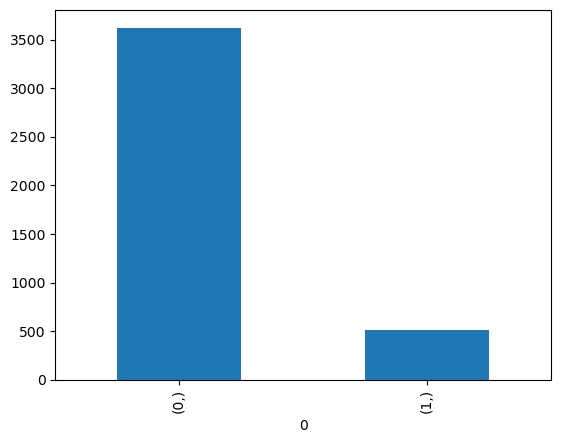

In [56]:
pd.DataFrame(y_train).value_counts().plot(kind="bar")

In [67]:
# Initialize the RandomOverSampler class with a random state of 42
sampler = RandomOverSampler(random_state=42)

# Pass the output of Vectorizer from train data to the fit_resample method of the sampler
# This will resample the train data to have a balanced class distribution
x_train_resampled, y_train_resampled = sampler.fit_resample(
    X_train_vectorized, # input train data that has been vectorized
    y_train # input train labels
)

<Axes: xlabel='0'>

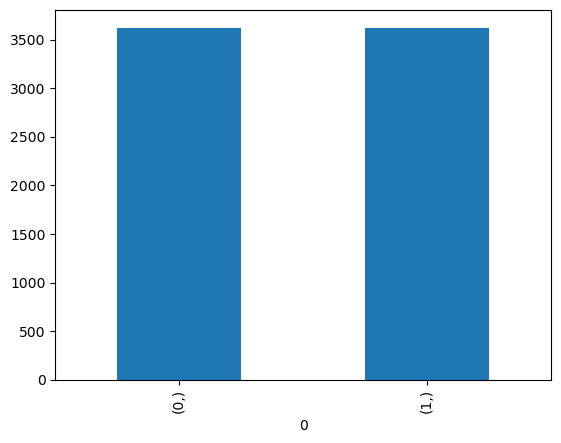

In [68]:
pd.DataFrame(y_train_resampled).value_counts().plot(kind="bar")

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_resampled,y_train_resampled)

RandomForestClassifier(random_state=42)

In [36]:
print("Train Accuracy: ", rf.score(x_train_resampled, y_train_resampled))
print("Test Accuracy: ", rf.score(X_test_vectorized, y_test))
print("Train Precision: ", precision_score(
    y_train_resampled, rf.predict(x_train_resampled)))
print("Test Precision: ", precision_score(y_test, rf.predict(X_test_vectorized)))

Train Accuracy:  1.0
Test Accuracy:  0.9709864603481625
Train Precision:  1.0
Test Precision:  1.0


In [37]:
y_pred_train_rf = rf.predict(x_train_resampled)
y_pred_test_rf = rf.predict(X_test_vectorized)

In [71]:
scoresdict = {}

Train_ACC=accuracy_score(y_train_resampled,rf.predict(x_train_resampled.toarray()))
Train_Prec=precision_score(y_train_resampled,rf.predict(x_train_resampled.toarray()))
Test_ACC=accuracy_score(y_test,rf.predict(X_test_vectorized.toarray()))
Test_Prec=precision_score(y_test,rf.predict(X_test_vectorized.toarray()))
scoresdict = [Train_ACC,Train_Prec,Test_ACC,Test_Prec]

scoresdf = pd.DataFrame(scoresdict,index=["Train_ACC","Train_Prec","Test_ACC","Test_Prec"]).T

In [72]:
scoresdf

,Train_ACC,Train_Prec,Test_ACC,Test_Prec
0,1.0,1.0,0.970986,1.0


### Testing

In [81]:
input1 =" K tell me anything about you."
input2 = "WINNER!! As a valued network customer you have been selected to receivea �900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only."

inp1= clean_text(input1)
inp2 =clean_text(input2)

# Transform the cleaned text into a vector that can be used by the machine learning model
inp1 = vectorizer.transform([inp1])
inp2 = vectorizer.transform([inp2])

# Use the random forest classifier to predict the category of the input text
# Convert the vectorized prediction back into a human-readable category
print(input1)
print(le.inverse_transform(rf.predict(inp1)))

print(input2)
print(le.inverse_transform(rf.predict(inp2)))

 K tell me anything about you.
['ham']
WINNER!! As a valued network customer you have been selected to receivea �900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
['spam']
